In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))


In [ ]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [37]:
'''
# class autoencoder():

#     def __init__(self,W,B):
#         self.W = W #W is a list of W[0] and W[1] , W[0] and W[1] are matrices of 4x3 and 3x4 respectively
#         self.B = B #B is a list of vectors B[0] and B[1]  where B[0] and  B[1] are matrices of 4x1 and 3x1 respectively

#     def forward(self,X):
#         X_hat=[]
#         A1=[]
#         H0=[]
#         A0=[]
#         for x in X:
#             x = np.array(x)
#             x = x.reshape(len(x),1) #numpy array to matrix helpful in matrix multiplication

#             #encoder Layer
#             A0_tmp= np.dot(self.W[0],x) + self.B[0] #A[0] is 4X1 matrix  , 4 = no. of neurons in hidden layer
#             print(f"A0_tmp shape is {A0_tmp.shape}",A0_tmp.shape)
#             A0.append(A0_tmp)

#             #hidden layer
#             H0_tmp= sigmoid(A0_tmp)  #H[0] is 4X1 matrix
#             print(f"H0_tmp shape is {H0_tmp.shape}",H0_tmp.shape)
#             H0.append(H0_tmp)


#             #Decoder Layer
#             A1_tmp= np.dot(self.W[1],H0_tmp) + self.B[1] #A1 is 3X1 matrix,  A1 is X_hat(decoded output) , 3 = no. of neurons in input layer
#             print(f"A1_tmp shape is {A1_tmp.shape}",A1_tmp.shape)
#             A1.append(A1_tmp)


#             #adding output for each point
#             X_hat.append(A1_tmp)
#         return X_hat , A1, H0, A0


#     def error(self, X, X_hat):   #look at the formula of error used here it is below in the image

#       error = 0.0
#       for i in range(len(X)):

#         error += np.mean((X_hat[i] - X[i].flatten()) ** 2)
#       return error

#     def backpropagate(self,X,lr,max_iter):

#       for i in range(max_iter):
#         X_hat , A1, H0, A0 = self.forward(X)

#         dw = [np.zeros_like(w) for w in self.W]
#         db = [np.zeros_like(b) for b in self.B]

#         for x,x_hat,h0,a0,a1 in zip(X,X_hat,H0,A0,A1):
#           x= np.array(x)
#           x = x.reshape(len(x),1)
#           dA1 = 2*(x_hat-x)
#           dw[1] = dw [1] + np.dot(dA1, h0.T)
#           db[1] = db[1] + dA1.reshape(-1)
#           dH0 = np.dot(self.W[1].T, dA1)
#           dA0 = dH0 * h0 * (1 - h0)
#           dw[0] = dw[0] + np.dot(dA0, x.T)
#           db[0] = db[0] + dA0.reshape(-1)

#         for i in range(len(self.W)):
#           self.W[i] = self.W[i] - lr*dw[i]
#           self.B[i] = self.B[i] - lr*db[i]
'''

'\n# class autoencoder():\n\n#     def __init__(self,W,B):\n#         self.W = W #W is a list of W[0] and W[1] , W[0] and W[1] are matrices of 4x3 and 3x4 respectively\n#         self.B = B #B is a list of vectors B[0] and B[1]  where B[0] and  B[1] are matrices of 4x1 and 3x1 respectively\n\n#     def forward(self,X):\n#         X_hat=[]\n#         A1=[]\n#         H0=[]\n#         A0=[]\n#         for x in X:\n#             x = np.array(x)\n#             x = x.reshape(len(x),1) #numpy array to matrix helpful in matrix multiplication\n\n#             #encoder Layer\n#             A0_tmp= np.dot(self.W[0],x) + self.B[0] #A[0] is 4X1 matrix  , 4 = no. of neurons in hidden layer\n#             print(f"A0_tmp shape is {A0_tmp.shape}",A0_tmp.shape)\n#             A0.append(A0_tmp)\n\n#             #hidden layer\n#             H0_tmp= sigmoid(A0_tmp)  #H[0] is 4X1 matrix\n#             print(f"H0_tmp shape is {H0_tmp.shape}",H0_tmp.shape)\n#             H0.append(H0_tmp)\n\n\n#             

In [38]:
class autoencoder():

    def __init__(self,W,B):
        self.W = W #W is a list of W[0] and W[1] , W[0] and W[1] are matrices of 4x3 and 3x4 respectively
        self.B = B #B is a list of vectors B[0] and B[1]  where B[0] and  B[1] are matrices of 4x1 and 3x1 respectively

    def forward(self,X):
        X_hat=[]
        A1=[]
        H0=[]
        A0=[]
        for x in X:
            x = np.array(x).reshape(-1, 1)  #reshaping
            a0 = np.dot(self.W[0], x) + self.B[0] #a0 = W0.x + b0
            h0 = sigmoid(a0)    #h0 = sigmoid(a0)
            a1 = np.dot(self.W[1], h0) + self.B[1] # a1 = W1.h0 + b1

            X_hat.append(a1)
            A1.append(a1)
            H0.append(h0)
            A0.append(a0)
        return X_hat , A1, H0, A0


    def error(self, X, X_hat):
      return np.mean([np.mean((x_hat - x.reshape(-1, 1)) ** 2) for x, x_hat in zip(X, X_hat)])

    def backpropagate(self,X,lr,max_iter):

      for iteration in range(max_iter):


        X_hat , A1, H0, A0 = self.forward(X)

        dW = [np.zeros_like(w) for w in self.W]
        dB = [np.zeros_like(b) for b in self.B]

        for i, x in enumerate(X):
          x = np.array(x).reshape(-1, 1)
          x_hat = X_hat[i]
          h0 = H0[i]
          a0 = A0[i]
          a1 = A1[i]


          dA1 = 2 * (x_hat - x)
          dW[1] = dW[1] + np.dot(dA1, h0.T)
          dB[1] = dB[1] + dA1

          dH0 = np.dot(self.W[1].T, dA1)
          dA0 = dH0 * sigmoid_derivative(h0)
          dW[0] = dW[0] + np.dot(dA0, x.T)
          dB[0] = dB[0] + dA0

        # Average the gradients
        n = len(X)
        for i in range(len(self.W)):
          dW[i] /= n
          dB[i] /= n
          self.W[i] -= lr * dW[i]
          self.B[i] -= lr * dB[i]

        if iteration % 100 == 0:
          error = self.error(X, X_hat)
          print(f"Iteration {iteration}, Error: {error}")

In [39]:
# Initialize weights and biases
W0 = np.random.randn(4, 3) * 0.01
W1 = np.random.randn(3, 4) * 0.01
W = [W0, W1]

B0 = np.zeros((4, 1))
B1 = np.zeros((3, 1))
B = [B0, B1]

# Create data X
X = np.array([
    [0.5, 2, 3],
    [4, 2, 1.2],
    [1.3, 0, 5.6],
    [1.9, 3.9, 4.6]
])

model = autoencoder(W, B)

# Train the model
model.backpropagate(X, lr=0.01, max_iter=1000)

Iteration 0, Error: 8.905562212704469
Iteration 100, Error: 1.9277404879562612
Iteration 200, Error: 1.7764321854811747
Iteration 300, Error: 1.4669046560656747
Iteration 400, Error: 1.0227466120142141
Iteration 500, Error: 0.7526826043371941
Iteration 600, Error: 0.646925217966525
Iteration 700, Error: 0.5892466064507489
Iteration 800, Error: 0.5462564263572044
Iteration 900, Error: 0.5101617535861047


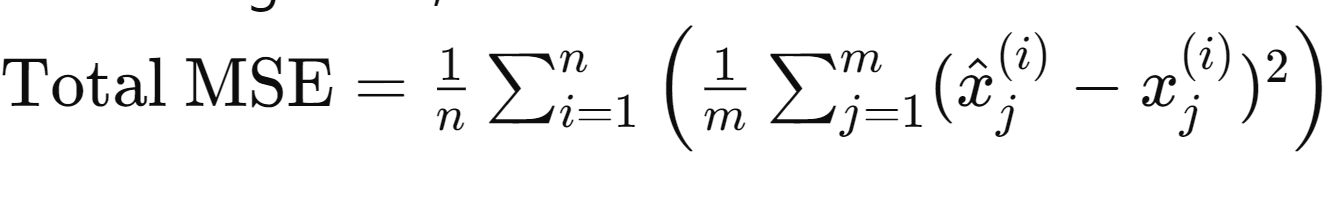

In [21]:
print(model.W)
print(model.B)

[array([[-0.7281066 ,  0.18484214,  0.79701972],
       [ 1.12458861,  0.9012613 , -0.73844948],
       [-0.77330407,  0.10468339,  0.92561552],
       [-0.75671907, -0.9256443 ,  0.60316267]]), array([[-0.58030721,  1.1846967 , -0.821962  , -0.79768565],
       [ 0.69194681,  1.94051947,  0.52471862, -1.38651445],
       [ 1.59114229,  0.57147991,  1.69647761,  1.99212815]])]
[array([[-0.47563004],
       [-0.627729  ],
       [-0.44817336],
       [-0.57915528]]), array([[2.47605469],
       [0.48952291],
       [0.31189485]])]


In [23]:
print(X)

[[0.5 2.  3. ]
 [4.  2.  1.2]
 [1.3 0.  5.6]
 [1.9 3.9 4.6]]


In [25]:
X_hat , A1, H0, A0 = model.forward(X)
print(X_hat)

[array([[1.47226711],
       [1.9326073 ],
       [3.9741993 ]]), array([[3.4980796 ],
       [2.53134186],
       [1.24158918]]), array([[0.47564043],
       [0.53897036],
       [5.22063062]]), array([[2.11273356],
       [3.16964915],
       [3.96615901]])]
